#**1. Preprocessing:**


##**1.1 Import thư viện:**


In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
import imutils
import numpy as np
from google.colab.patches import cv2_imshow


##**1.2 Tiền xử lí ảnh:**


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/Capstone_Dataset'
!ls

/content/drive/My Drive/Colab Notebooks/Capstone_Dataset
B  C  CT  D  E


In [ ]:
ImgTest = cv2.imread('/content/drive/My Drive/Colab Notebooks/Capstone_Dataset/E/IMG_3948.JPG')

####**Show ImgTest:**

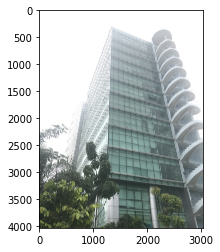

In [ ]:
#plt.axis('off')
plt.imshow(cv2.cvtColor(ImgTest,cv2.COLOR_BGR2RGB))

###**1.1.1 Convert to Grayscale Image:**


In [ ]:
ImgTest = cv2.cvtColor(ImgTest,cv2.COLOR_RGB2GRAY)

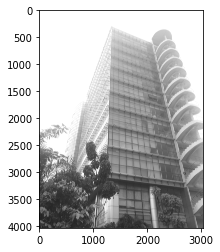

In [ ]:
plt.imshow(ImgTest,cmap=plt.get_cmap('gray'))

###**1.2.2 Resize:**

+ Thông thường, **resize** một bức ảnh thường chúng ta không quan tâm đến tỉ số giữa chiều dài và chiều rộng (**aspect ratio**) của bức ảnh, điều này sẽ dẫn đến bức ảnh sau khi **resize** có thể bị méo mó.
> + Ví dụ: 
>
><img src="https://drive.google.com/uc?id=1QMhhGN-CbhaOD-4wKK0UP0qChA-j9PZs
" alt="Compare" class="center" width=500/>
>
> Đối với hình ở giữa (**Ingore Aspect ratio**) thì khi resize lại thì ảnh sẽ bị kéo dài ra hai bên, còn hình bên tay phải (**Consider Aspect ratio**) có hình dáng gần giống với ảnh gốc hơn. 


####**Resize without aspect ratio:**

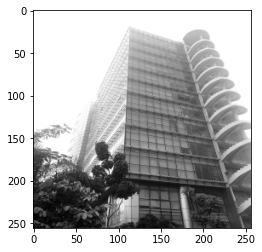

In [ ]:
ImgTest_rs = cv2.resize(ImgTest,(256,256),interpolation=cv2.INTER_AREA)
#plt.axis('off')
plt.imshow(ImgTest_rs,cmap=plt.get_cmap('gray'))

####**Resize aspect ratio:**

In [ ]:
def resize_ratio(img,self_width = 256,self_height = 256,self_inter = cv2.INTER_AREA):
    # get size of image
    (h,w) = img.shape[:2]
    dW = 0
    dH = 0
    if w < h:
        img = imutils.resize(img,width=self_width,inter=self_inter)
        dH = int((img.shape[0] - self_height)/2.0)
    else:
        img = imutils.resize(img,height=self_height,inter=self_inter)
        dW = int((img.shape[1] - self_width)/2.0)

    (h,w) = img.shape[:2]
    img = img[dH:h - dH,dW:w - dW]

    return cv2.resize(img,(self_width,self_height),interpolation=self_inter)



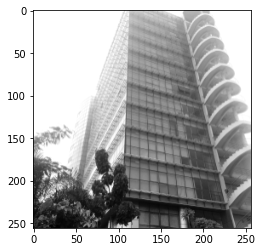

In [ ]:
ImgTest_ratio = resize_ratio(ImgTest)
plt.imshow(ImgTest_ratio,cmap=plt.get_cmap('gray'))

###**1.2.3 Cân bằng sáng (Histogram Equalization):**

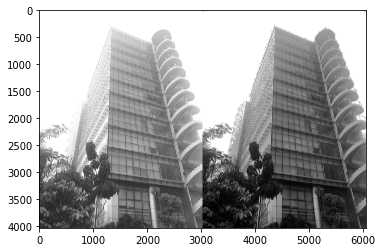

In [ ]:
ImgE = ImgTest
equ = cv2.equalizeHist(ImgE)
ImgE = np.hstack((ImgE,equ))
plt.imshow(ImgE,cmap=plt.get_cmap('gray'))

###**1.2.4 Bộ lọc làm mờ Bilateral(Bilateral Filtering):**


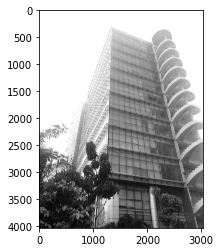

In [ ]:
Img_Bilateral = cv2.bilateralFilter(ImgTest,9,75,75)
plt.imshow(Img_Bilateral,cmap=plt.get_cmap('gray'))

##**1.3 Ghi vào file Preprocessing.py:**


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/CS114.K21.KHTN/[Capstone Study] New_ML_FinalProject/Preprocessing'

/content/drive/My Drive/Colab Notebooks/CS114.K21.KHTN/[Capstone Study] New_ML_FinalProject/Preprocessing


In [41]:
%%writefile Preprocessing.py 
import cv2

def resize_ratio(img,self_width = 256,self_height = 256,self_inter = cv2.INTER_AREA):
    # get size of image
    (h,w) = img.shape[:2]
    dW = 0
    dH = 0
    if w < h:
        img = imutils.resize(img,width=self_width,inter=self_inter)
        dH = int((img.shape[0] - self_height)/2.0)
    else:
        img = imutils.resize(img,height=self_height,inter=self_inter)
        dW = int((img.shape[1] - self_width)/2.0)

    (h,w) = img.shape[:2]
    img = img[dH:h - dH,dW:w - dW]

    return cv2.resize(img,(self_width,self_height),interpolation=self_inter)

def preprocessing(Image,w=256,h=256):
    # covert to grayscale
    Image = cv2.cvtColor(Image,cv2.COLOR_BGR2GRAY)
    # Equalize Histogram
    Image = cv2.equalizeHist(Image)
    # Bilateral Filter
    Image = cv2.bilateralFilter(Image,9,75,75)   
    # Resize aspect ratio
    Image = resize_ratio(Image)
    return Image



Overwriting Preprocessing.py


In [ ]:
%%writefile __init__.py
from .Preprocessing import *

Writing __init__.py
